<a href="https://colab.research.google.com/github/Amith07220/Sentimental-Analysis/blob/main/Assignment_3_C0937030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION 1: Loading the Dataset and Displaying the basic info about the dataset:

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())


First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrm

SECTION 2: Utilizing Visualization features- Plotting, Correlation Heatmap:

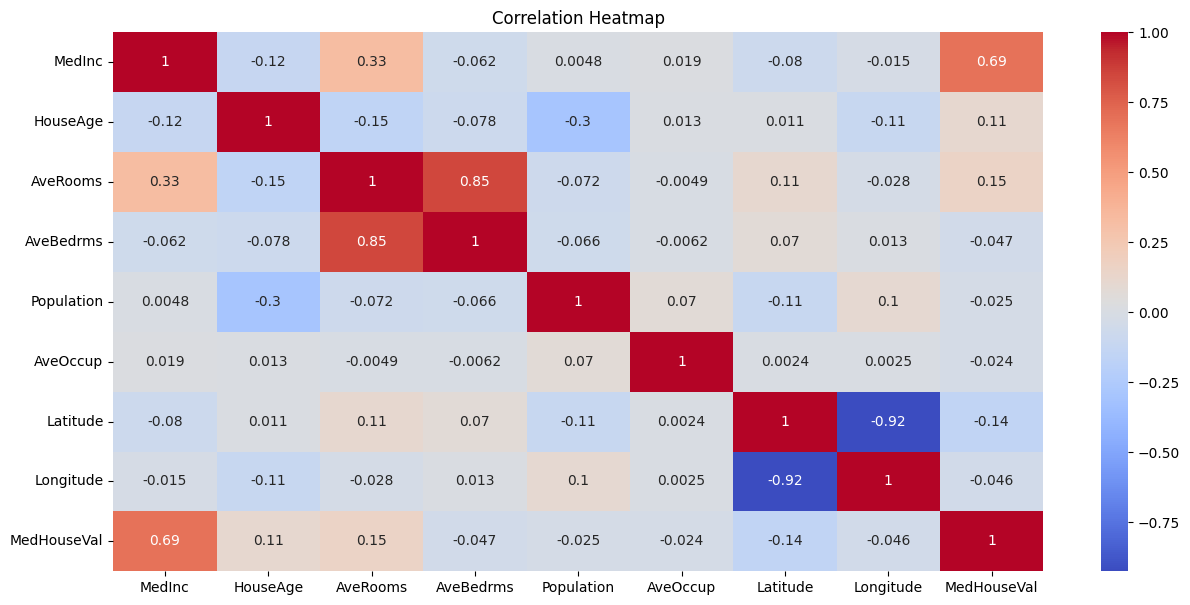

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the target variable to the DataFrame for easy plotting
df['MedHouseVal'] = data.target

# Plot a correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


SECTION 3: TRAINING LINEAR  REGRESSION MODELS AND DISPLAY OF PERFORMANCE METRICS:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


Model Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Model Intercept: -37.02327770606409

Model Performance Metrics:
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


SECTION 4: ACTUAL HOUSE PRICING VS TRAINING MODEL PREDICTION PLOT:

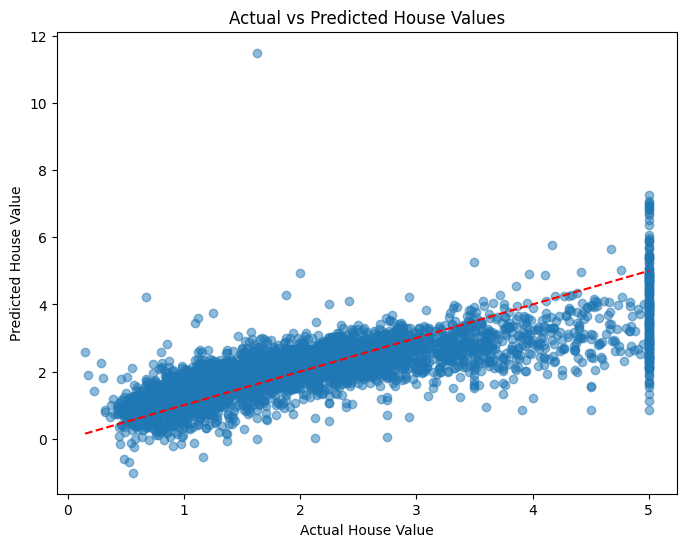

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values')
plt.show()


SECTION 5: IMPROVING CURRENT MODEL, SELECTION  OF TOP 5 FEATURES, EVALUATION OF PREDICTION SCORES

In [10]:
from sklearn.preprocessing import StandardScaler

# Select top 5 correlated features with the target
corr_matrix = df.corr()
top_features = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False)[1:6].index
print("Top 5 correlated features:", top_features.tolist())

# Create a new DataFrame with only top features
X_top = df[top_features]
y = df['MedHouseVal']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Apply standardization (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the model with scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict again
y_pred = model.predict(X_test_scaled)

# Re-evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nImproved Model Metrics:")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


Top 5 correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']

Improved Model Metrics:
R² Score: 0.5129333248216974
MAE: 0.5796603458789068
MSE: 0.6382565441555917
RMSE: 0.7989095969855361
